In [5]:
import pandas as pd
import numpy as np
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
dialogues = pd.read_csv("dialogues_bigbangtheory.csv")

In [7]:
dialogues.head()

,episode_no,dialogue,character
0,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Scene
1,Series 01 Episode 01 – Pilot Episode,So if a photon is directed through a plane wi...,Sheldon
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard
3,Series 01 Episode 01 – Pilot Episode,"There’s no point, I just think it’s a good id...",Sheldon
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard


In [14]:
sheldon_dialogues = dialogues[dialogues['character']=='Sheldon']

In [15]:
sheldon_dialogues.head()

,episode_no,dialogue,character
1,Series 01 Episode 01 – Pilot Episode,So if a photon is directed through a plane wi...,Sheldon
3,Series 01 Episode 01 – Pilot Episode,"There’s no point, I just think it’s a good id...",Sheldon
10,Series 01 Episode 01 – Pilot Episode,I think this is the place.,Sheldon
15,Series 01 Episode 01 – Pilot Episode,"Leonard, I don’t think I can do this.",Sheldon
17,Series 01 Episode 01 – Pilot Episode,No. We are committing genetic fraud. There’s ...,Sheldon


In [17]:
sheldon_dialogues.shape[0]

11359

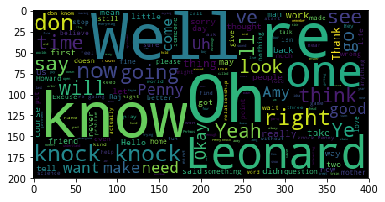

In [18]:
input_string2 = ' '.join(sheldon_dialogues['dialogue'])
wc = WordCloud(background_color = "Black").generate(input_string2)
plt.imshow(wc)

In [19]:
docs = sheldon_dialogues['dialogue'].str.lower().str.replace('[^a-z ]', '')
docs.head()

1      so if a photon is directed through a plane wi...
3      theres no point i just think its a good idea ...
10                            i think this is the place
15                   leonard i dont think i can do this
17     no we are committing genetic fraud theres no ...
Name: dialogue, dtype: object

In [20]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

In [21]:
stemmer = nltk.stem.PorterStemmer()

In [22]:
docs=sheldon_dialogues['dialogue'].str.lower().str.replace('[^a-z ]','')
docs_clean2=[]
def clean_sentence(text):
    words=text.split(' ')
    words_clean2 = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean2)
docs_clean2 = docs.apply(clean_sentence)
docs_clean2.head()

1      photon direct plane two slit either slit obse...
3                  there point think good idea teeshirt
10                                          think place
15                                   leonard dont think
17     commit genet fraud there guarante sperm go ge...
Name: dialogue, dtype: object

In [23]:
docs_clean2.iloc[1]

' there point think good idea teeshirt'

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(10)
vectorizer.fit(docs_clean2)
dtm = vectorizer.transform(docs_clean2)
dtm

<11359x10138 sparse matrix of type '<class 'numpy.int64'>'
	with 84319 stored elements in Compressed Sparse Row format>

In [29]:
no_of_zeros = (11359*10138 ) - 84319 
sparsity = (no_of_zeros) / (11359*10138 ) * 100
sparsity

99.9267794375118

In [26]:
df_dtm = pd.DataFrame(dtm.toarray(),
                     columns = vectorizer.get_feature_names())
(df_dtm == 0).sum().sum()

115073223

In [27]:
(5053 * 6145) - 31013412

37273

In [31]:
from nltk.sentiment import SentimentIntensityAnalyzer
def get_sentiment_sheldon(text):
    sentiment = SentimentIntensityAnalyzer()
    compound = sentiment.polarity_scores(text)['compound']
    if compound > 0.05:
        return 'Positive'
    elif compound < -0.05:
        return 'Negative'
    else:
        return 'Neutral'
sheldon_dialogues['sentiment_vader'] = sheldon_dialogues['dialogue'].apply(get_sentiment_sheldon)

C:\Users\Aditya\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [32]:
sheldon_dialogues['sentiment_vader'].value_counts()

Positive    4879
Neutral     4009
Negative    2471
Name: sentiment_vader, dtype: int64

In [33]:
dialogues.episode_no.iloc[1]

'Series 01 Episode 01 – Pilot Episode'